17.31 In Prob. 17.11 we used transformations to linearize and fit
the following model:


y = axe^(bx)

    
Use nonlinear regression to estimate a and b based on the following data. Develop a plot of your fit along with the data.


x [0.1, 0.2, 0.4, 0.6, 0.9, 1.3, 1.5, 1.7, 1.8]


y [0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.28, 0.18]


Problem from "Numerical Methods for Engineers, SIXTH EDITION" by S. Chapra and R. Canale

In [1]:
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress

In [2]:
x_data = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.3, 1.5, 1.7, 1.8])
y_data = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.28, 0.18])

In [9]:
def function(x, a, b):
    return a*x*(2.71828182**(b*x))

In [4]:
def residuals(p, x, y):
    return y - function(x, *p)

In [5]:
x0 = [1., 1.]

In [31]:
fit = least_squares(residuals, x0, loss='soft_l1', f_scale=0.01, method='trf', tr_solver='exact', args=(x_data, y_data))

In [32]:
fit

 active_mask: array([0., 0.])
        cost: 0.002739637864838473
         fun: array([-0.0156114 ,  0.05874654,  0.00799839, -0.05914749, -0.07464962,
        0.06073834,  0.00831913,  0.04562574, -0.0130631 ])
        grad: array([-6.48067754e-12,  6.26656191e-08])
         jac: array([[-0.03081883, -0.03032904],
       [-0.00832117, -0.01637785],
       [-0.10112099, -0.39805576],
       [-0.00905444, -0.05346326],
       [-0.00454569, -0.04026104],
       [-0.00325531, -0.04164651],
       [-0.02340252, -0.34545901],
       [-0.00235923, -0.03946947],
       [-0.00929731, -0.1646919 ]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 32
        njev: 29
  optimality: 6.266561909575724e-08
      status: 2
     success: True
           x: array([ 9.84107644, -2.51060554])

In [33]:
coefs = fit.x
fit_line = function(x_data, coefs[0], coefs[1])
fit_line

array([0.7656114 , 1.19125346, 1.44200161, 1.30914749, 0.92464962,
       0.48926166, 0.34168087, 0.23437426, 0.1930631 ])

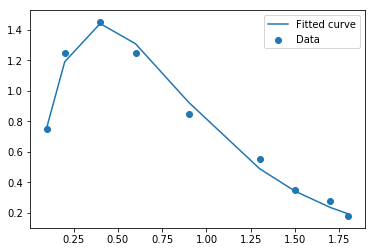

In [34]:
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, fit_line, label='Fitted curve')
plt.legend()
plt.show()

In [35]:
regress = linregress(x_data, fit_line)
regress

LinregressResult(slope=-0.6149252356077646, intercept=1.3464342199115165, rvalue=-0.8419460950907879, pvalue=0.0044122782226374835, stderr=0.14894642451347595)